<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Image_Pre_Processing_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Lets start processing images of fruits to get the accuracy improved.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
PATH = '/content/drive/My Drive/data/sample_data/dataset/dataset'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')

In [0]:
train_fresh_apples_dir = os.path.join(train_dir, 'freshapples')  # directory with our training fresh pictures
train_rotten_apples_dir = os.path.join(train_dir, 'rottenapples')  # directory with our training rotten pictures
validation_fresh_apples_dir = os.path.join(validation_dir, 'freshapples')  # directory with our validation fresh pictures
validation_rotten_apples_dir = os.path.join(validation_dir, 'rottenapples')  # directory with our validation rotten pictures


In [0]:
num_fresh_apples_tr = len(os.listdir(train_fresh_apples_dir))
num_rotten_apples_tr = len(os.listdir(train_rotten_apples_dir))

num_fresh_apples_val = len(os.listdir(validation_fresh_apples_dir))
num_rotten_apples_val = len(os.listdir(validation_rotten_apples_dir))

total_train = num_fresh_apples_tr + num_rotten_apples_tr
total_val = num_fresh_apples_val + num_rotten_apples_val


In [11]:
print('total training fresh apples images:', num_fresh_apples_tr)
print('total training rotten apples images:', num_rotten_apples_tr)

print('total validation fresh apples images:', num_fresh_apples_val)
print('total validation rotten apples images:', num_rotten_apples_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training fresh apples images: 1693
total training rotten apples images: 2342
total validation fresh apples images: 395
total validation rotten apples images: 601
--
Total training images: 4035
Total validation images: 996


In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 10901 images belonging to 6 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


Found 2698 images belonging to 6 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


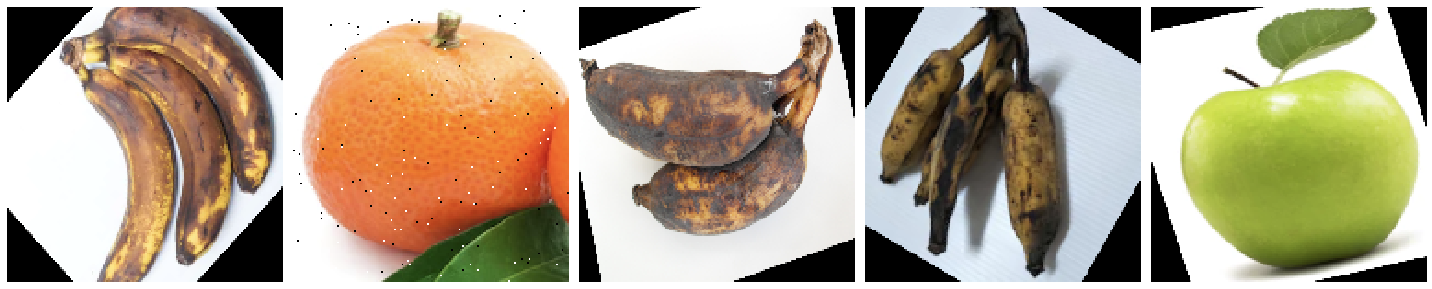

In [18]:
plotImages(sample_training_images[:5])


In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [22]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15


ValueError: ignored

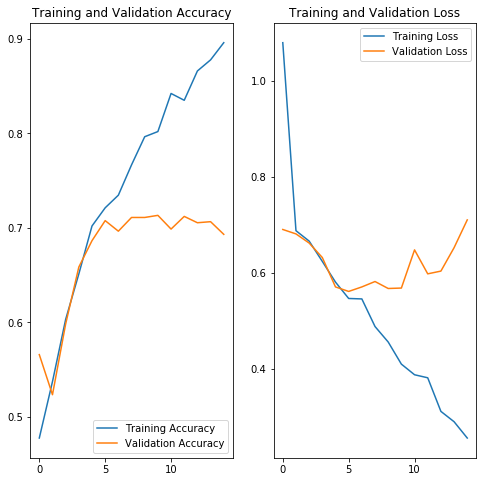

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)


In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


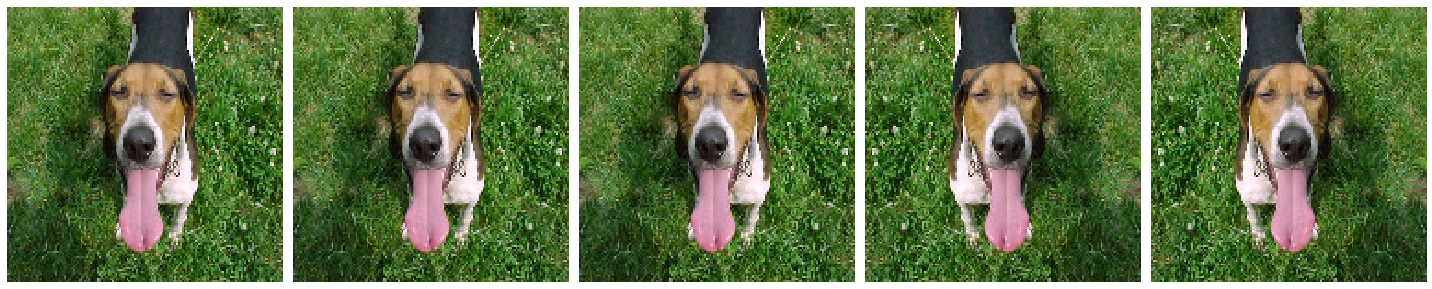

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


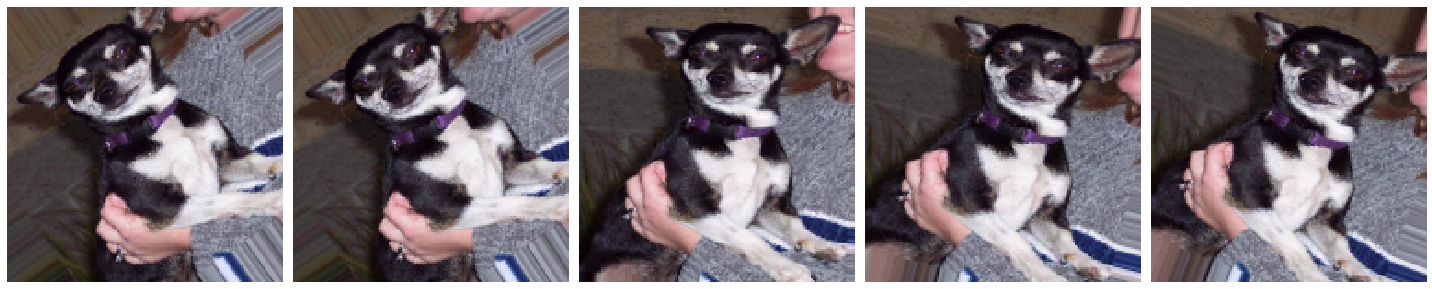

In [0]:
plotImages(augmented_images)


In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 


In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


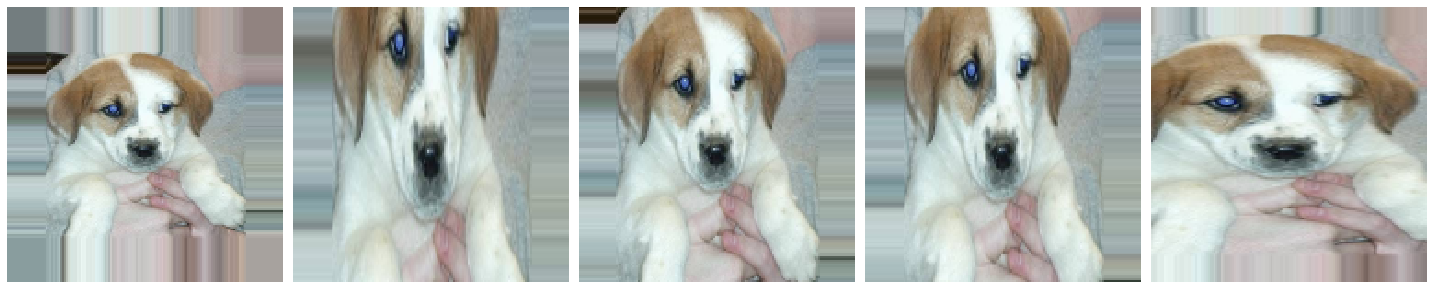

In [0]:
plotImages(augmented_images)


In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


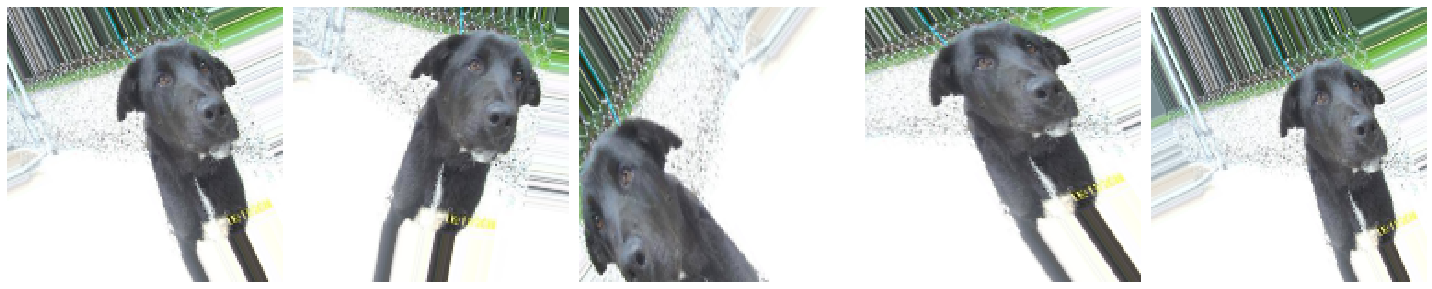

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [0]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
15/15 [==============================] - 77s 5s/step - loss: 1.0502 - accuracy: 0.4989 - val_loss: 0.6970 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 78s 5s/step - loss: 0.6939 - accuracy: 0.5047 - val_loss: 0.6924 - val_accuracy: 0.5547
Epoch 3/15
15/15 [==============================] - 75s 5s/step - loss: 0.6915 - accuracy: 0.5082 - val_loss: 0.6840 - val_accuracy: 0.5848
Epoch 4/15
15/15 [==============================] - 78s 5s/step - loss: 0.6850 - accuracy: 0.5141 - val_loss: 0.6672 - val_accuracy: 0.5391
Epoch 5/15
15/15 [==============================] - 75s 5s/step - loss: 0.6713 - accuracy: 0.5669 - val_loss: 0.6512 - val_accuracy: 0.5770
Epoch 6/15
15/15 [==============================] - 77s 5s/step - loss: 0.6610 - accuracy: 0.5657 - val_loss: 0.6449 - val_accuracy: 0.5804
Epoch 7/15
15/15 [==============================] - 79s 5s/step - loss: 0.6684 - accuracy: 0.5776 - val_loss: 0.6467 - val_accuracy: 0.5938
Epoch 8/15
15/15 [==

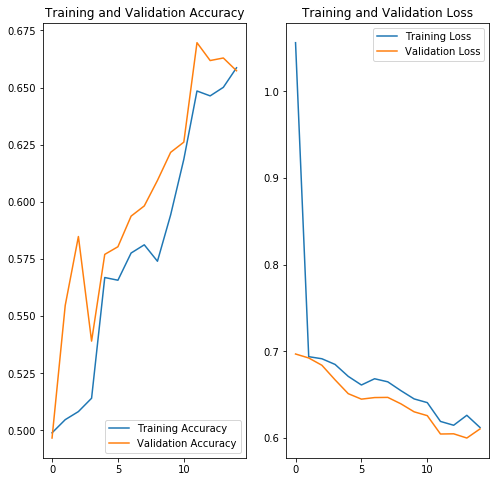

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
